In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Problem 4: Regression

## Part 1: Load and Explore the Data

### Load the dataset and write MSE function

In [2]:
def loadMusicData(fname, addBias):
    txt_file = np.loadtxt(fname, delimiter=",")
#     if addBias == True:
#         txt_file = np.insert(txt_file, txt_file.shape[1], 1, axis=1)
    test_set_size = 463714
    trainYears = txt_file[:test_set_size, 0]
    trainFeat = txt_file[:test_set_size, 1:]
    testYears = txt_file[test_set_size:, 0]
    testFeat = txt_file[test_set_size:, 1:]
    return trainYears, trainFeat, testYears, testFeat

addBias = True
fname = '/Users/aya/Desktop/DL/YearPredictionMSD.txt'
trainYears, trainFeat, testYears, testFeat = loadMusicData(fname, addBias)

In [3]:
def musicMSE(pred, gt):
    try:
        #mse = ((np.round(pred) - gt)**2).mean()
        mse = np.mean(np.square(np.round(pred) - gt))
        return mse 
    except Exception as e:
        print(f"Unexpected {e=}, {type(e)=}")

### Discuss Properties:

In [4]:
print(type(trainYears), type(trainFeat), type(testYears), type(testFeat))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
# print(np.info(trainYears))
# print(np.info(testYears))

In [6]:
#Convert all float elements in ndarray (representing the years) into integers
trainYears_int = trainYears.astype(int)
testYears_int = testYears.astype(int)
np.unique(trainYears_int)

array([1922, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011])

In [7]:
#Let us check the shape and type of each variables returned by loadMusicData
print("Train Years: ", trainYears.shape)  
print("Train Features: ", trainFeat.shape) 
print("Test Years: ", testYears.shape) 
print("Test Features: ", testFeat.shape) 
#Let us check the ranges of the variables
print("Train target years range: ", np.min(trainYears.astype(int)), "to", np.max(trainYears.astype(int)))
print("Train features range: ", np.min(trainFeat), "to", np.max(trainFeat)) 
print("Test target years range: ", np.min(testYears.astype(int)), "to", np.max(testYears.astype(int)))
print("Test features range: ", np.min(testFeat), "to", np.max(testFeat)) 

Train Years:  (463714,)
Train Features:  (463714, 90)
Test Years:  (51631,)
Test Features:  (51631, 90)
Train target years range:  1922 to 2011
Train features range:  -14861.69535 to 65735.77953
Test target years range:  1927 to 2010
Test features range:  -13390.36069 to 44023.7892


In [8]:
year_counts = np.bincount(trainYears.astype(int))
most_common_year = np.argmax(year_counts)
print("The most common year is:", most_common_year)

The most common year is: 2007


In [9]:
predictions = np.full(testYears.shape, most_common_year)
mse_val = musicMSE(predictions, testYears)
print(mse_val)

190.08239236117836


The data is numerical. The train dataset has 463714 rows (i.e. music instances) and the test dataset contains 51631 rows.
There are 90 features (of type float64) for each music and one target (the release year of a song).

###### What is the range of the variables (features) ? 
- The range of the train features is [-14861.69, 65735.78].
- The range of the test features is [-13390.36, 44023.79].
- Overall range between train and test dataset for the features: [-13390.36, 65735.78].

###### What is the range of the variables (targets) ? 
- The range of the train targets (years) is [1922, 2011].
- The range of the train targets (years) is [1927, 2010].
- Overall range between train and test dataset for the targets: [1922, 2011].

###### How might you normalize them? 
We could use the Z-score normalization to scale the values of each feature by having a mean of 0 and standard deviation of 1. To do so, we could apply the following formula to all the features in the training and the testing dataset :

f_normalized = (f - mean) / std 

where the mean and the standard deviation is calculated from the training dataset, and where 'f' is an arbitrary feature within any of the two datasets.

###### What years are represented in the dataset?
The years represented in the datasets are: 1922, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011.
    
###### What will the test mean squared error (MSE) be if your classifier always outputs the most common year in the dataset?
The test MSE value will be 190.08 if the classifier always outputs the most common year in the dataset.

## Part 2: Classification

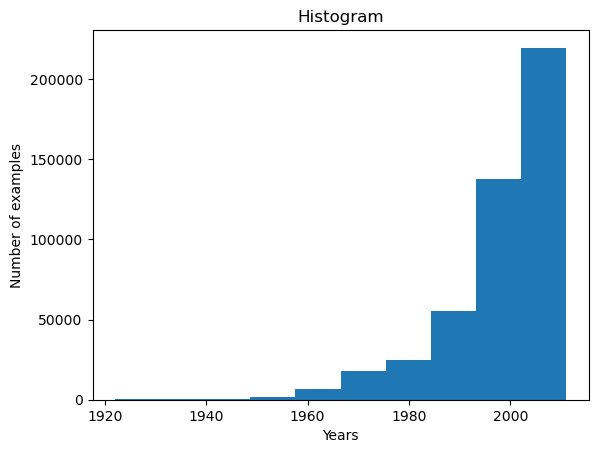

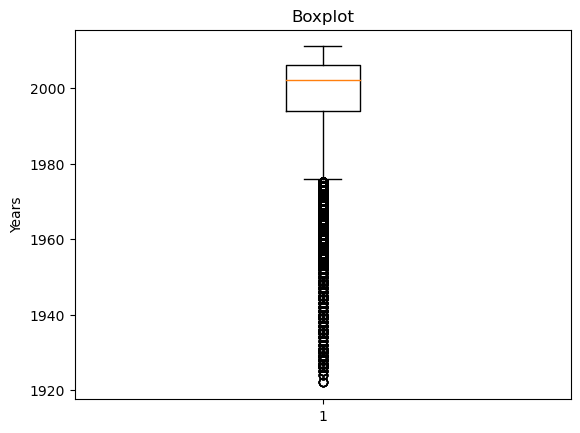

In [10]:
plt.hist(trainYears)
plt.title('Histogram')
plt.xlabel('Years')
plt.ylabel('Number of examples')
plt.show()

plt.boxplot(trainYears)
plt.title('Boxplot')
plt.ylabel('Years')
plt.show()

This problem could have been posed as a classification problem by treating each year as a category. 
##### What would be the problems with this approach? 

As we can see on the bar chart, the data is skewed left as there are uneven number of datapoints (music instances) for each year. Indeed, some years have significantly more music examples than others especially around the years 2000 onwards. The number of examples in the dataset from 2005 to 2011 is approximatively four times larger than the number of examples from 1922 to 1985. 
This imbalance in the dataset can adversely affect the model's performance and lead to biased predictions where the model might perform better on the majority years (\~1990 to 2011) and worse on the minority years (~1922 to 1990).
To overcome this issue, we could treat the year as a continuous variable and use regression techniques instead of classification.

## Part 3: Implementing Ridge (Tikhonov) Regression

In [11]:
def normalize_addbias(train, test):
    mean = np.mean(train, axis = 0)
    std = np.std(train, axis = 0)

    train_norm = (train.copy() - mean) / std
    test_norm = (test.copy() - mean) / std 
    
    train = np.hstack((train_norm, np.ones((train.shape[0], 1))))
    test = np.hstack((test_norm, np.ones((test.shape[0], 1))))
    
    return train, test

In [12]:
def sgd_minibatch(X_train, y_train, X_test, y_test, loss, wd, alpha, lr, epochs, batch_size):
    
    #initialize weights
    n_features = X_train.shape[1]
    np.random.seed(0)
    w = np.random.randn(n_features) #np.random.normal(0, 0.01, n_features) 
    
    #initialize train and test loss history list
    train_losses = []
    test_losses = []
    
    #loop over epochs
    for epoch in range(epochs):
        #shuffle the training data
        permutation = np.random.permutation(X_train.shape[0])
        X_train_perm = X_train[permutation]
        y_train_perm = y_train[permutation]
        
        #loop over mini-batches
        for i in range(0, X_train_perm.shape[0], batch_size):
            X_batch = X_train_perm[i:i+batch_size]
            y_batch = y_train_perm[i:i+batch_size]
            
            pred = X_batch @ w
            error = pred - y_batch
            grad = np.mean((2*error).reshape(-1, 1) * X_batch, axis=0)
            
            if loss== 'count':
                #grad = np.mean(X_batch.T @ (error))
                pred = np.clip(pred, -100, 100)
                counts = np.exp(pred)
                grad = np.mean((counts - y_batch)[:, np.newaxis] * X_batch, axis=0)
            
            #add l2 regularization gradient, ridge    
            if wd == 'L2':
                reg = l2_regularization(alpha, w, grad = True) #2*alpha * w
                grad += reg 
            #add l1 regularization gradient, lasso
            elif wd == 'L1':
                reg = l1_regularization(alpha, w, grad = True) #alpha * np.sign(w) 
                grad += reg 
            
            w -= lr * grad 
            
        #compute train and test loss
        train_pred , test_pred = (X_train @ w), (X_test @ w)
        
        if loss == 'L2': #mse
            train_loss = musicMSE(train_pred, y_train) 
            test_loss = musicMSE(test_pred, y_test)
                
        elif loss == 'count':
            train_predd = np.clip(train_pred, -100, 100)
            counts = np.exp(train_predd)
            train_loss = np.mean(counts - y_train * np.log(counts))
            test_predd = np.clip(test_pred, -100, 100)
            counts = np.exp(test_predd)
            test_loss = np.mean(counts - y_test * np.log(counts))
        
        
        #add regularization in loss function
        if wd == 'L2': 
            train_loss += l2_regularization(alpha, w) #alpha * np.sum(w*w)
            test_loss += l2_regularization(alpha, w) #alpha * np.sum(w*w)
        elif wd == 'L1':
            train_loss += l1_regularization(alpha, w) #alpha * np.sum(np.abs(w))
            test_loss += l1_regularization(alpha, w) #alpha * np.sum(np.abs(w))
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        if epoch%20==0:
            print(f"Epoch {epoch} | training loss: {np.round(train_loss,2)} | test loss: {np.round(test_loss,2)}")

    return w, train_losses, test_losses

def l2_regularization(alpha, w, grad = False):
    bias = w[-1]
    w_without_bias = w[:-1]
    if grad:
        reg_grad = 2 * alpha * w_without_bias
        return np.append(reg_grad, [0])
    reg = alpha * np.sum(w_without_bias**2)
    return reg

def l1_regularization(alpha, w, grad = False):
    bias = w[-1]
    w_without_bias = w[:-1]
    if grad:
        reg_grad = alpha * np.sign(w_without_bias)
        return  np.append(reg_grad, [0])
    reg = alpha * np.sum(np.abs(w_without_bias))
    return reg

## Calling Ridge Regression

Epoch 0 | training loss: 2256245.58 | test loss: 2256504.9
Epoch 20 | training loss: 116.76 | test loss: 116.31
Epoch 40 | training loss: 91.46 | test loss: 90.69
Epoch 60 | training loss: 91.37 | test loss: 90.61


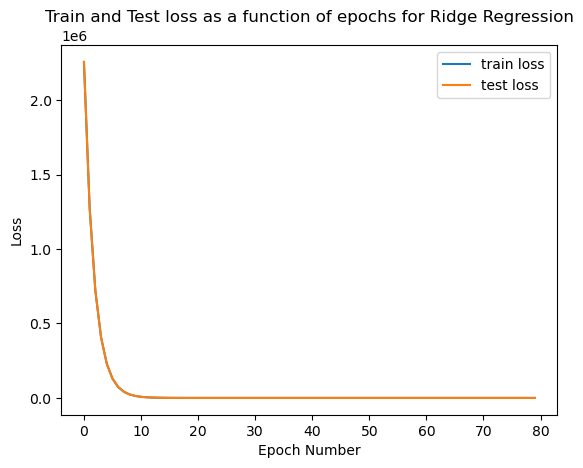

In [70]:
ntrainFeat, ntestFeat = normalize_addbias(trainFeat, testFeat)


w_ridge, train_losses, test_losses = sgd_minibatch(ntrainFeat, trainYears_int, ntestFeat, testYears_int, \
                                             loss= 'L2', wd = 'L2',\
                            alpha = 0.0001 , lr = 0.0025, epochs = 80, batch_size = 8192)
plt.plot(train_losses)
plt.plot(test_losses)
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Train and Test loss as a function of epochs for Ridge Regression')
plt.legend(['train loss', 'test loss'])
plt.show()

In [71]:
train_losses[-1], test_losses[-1]

(91.3520112433287, 90.57039411685116)

- Learning rate chosen: 0.0025
- Weight decay factor chosen: 0.0001
- Final training and testing loss for RIDGE: 91.3520 and90.5704 respectively

In [75]:
def pseudoinverse(X_train, y_train, alpha):
    y = y_train.reshape(-1, 1)
    I = np.identity(X_train.shape[1])
    a = np.linalg.inv(np.matmul(X_train.T, X_train) + (alpha*I))
    b = np.dot(X_train.T, y)
    w = np.matmul(a, b)
    return w

trainFeat_norm, _ = normalize_addbias(trainFeat, testFeat)
w_pseudo_inv = pseudoinverse(trainFeat_norm, trainYears_int, alpha = 0.0001)

pseudo_inverse_train_loss = musicMSE(np.squeeze(np.dot(ntrainFeat, w_pseudo_inv)), trainYears_int)
pseudo_inverse_test_loss = musicMSE(np.squeeze(np.dot(ntestFeat, w_pseudo_inv)), testYears_int)

print('Pseudo Inverse train loss:', pseudo_inverse_train_loss)
print('Ridge Regression final train loss:', train_losses[-1])
print('Pseudo Inverse test loss:', pseudo_inverse_test_loss)
print('Ridge Regression final test loss:', test_losses[-1])

Pseudo Inverse train loss: 91.3457519074257
Ridge Regression final train loss: 91.3520112433287
Pseudo Inverse test loss: 90.5480815788964
Ridge Regression final test loss: 90.57039411685116


It seems that both the Pseudo Inverse and Ridge Regression models have more or less similar performance as the difference in train and test loss is relatively small and may not be significant.
The Pseudo Inverse model performs slightly better on both the training and testing dataset as it has lower train and test loss (91.346 and 90.548 respectively) compared to the Ridge Regression model's final train and test loss (91.351 and 90.551 respectively).

## Part 4: Implementing L1 Weight Decay (Lasso Regression)

Epoch 0 | training loss: 2256245.55 | test loss: 2256504.84
Epoch 20 | training loss: 116.76 | test loss: 116.31
Epoch 40 | training loss: 91.46 | test loss: 90.69
Epoch 60 | training loss: 91.37 | test loss: 90.61


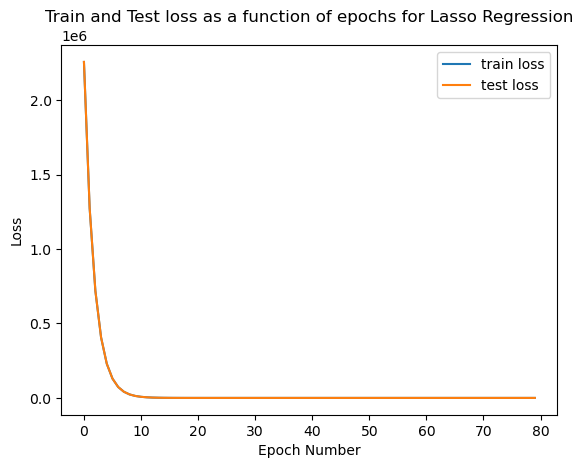

In [76]:
w_lasso, train_losses_lasso, test_losses_lasso = sgd_minibatch(ntrainFeat, trainYears_int, ntestFeat, testYears_int, \
                                             loss= 'L2', wd = 'L1', \
                                             alpha = 0.0001 , lr = 0.0025, epochs = 80, batch_size = 8192)

plt.plot(train_losses_lasso)
plt.plot(test_losses_lasso)
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Train and Test loss as a function of epochs for Lasso Regression')
plt.legend(['train loss', 'test loss'])
plt.show()

In [78]:
train_losses_lasso[-1], test_losses_lasso[-1]

(91.3489502566575, 90.5691081125489)

- Learning rate chosen: 0.0025
- Weight decay factor chosen: 0.0001
- Final training and testing loss for LASSO: 91.3489 and 90.5791 respectively

## Part 5: Implementing Count Regression

Epoch 0 | training loss: 5.796929016195618e+37 | test loss: 199849.59
Epoch 20 | training loss: 199838.61 | test loss: 199849.59
Epoch 40 | training loss: 199838.61 | test loss: 199849.59
Epoch 60 | training loss: 199838.61 | test loss: 199849.59
Epoch 80 | training loss: 199838.61 | test loss: 199849.59
Epoch 100 | training loss: 199838.61 | test loss: 199849.59


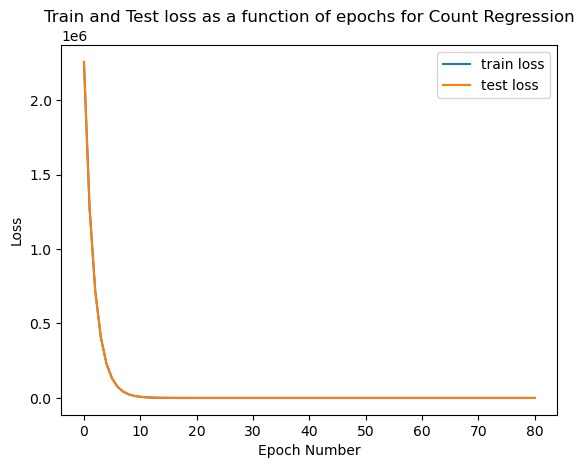

In [62]:
w_count, train_losses_count, test_losses_count = sgd_minibatch(ntrainFeat, trainYears_int, ntestFeat, testYears_int, \
                                             loss= 'count', wd = 'None',\
                                    alpha = 0.1 , lr = 0.000001, epochs = 101, batch_size = 1024)
plt.plot(train_losses)
plt.plot(test_losses)
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Train and Test loss as a function of epochs for Count Regression')
plt.legend(['train loss', 'test loss'])
plt.show()

## Part 6: Model Comparison

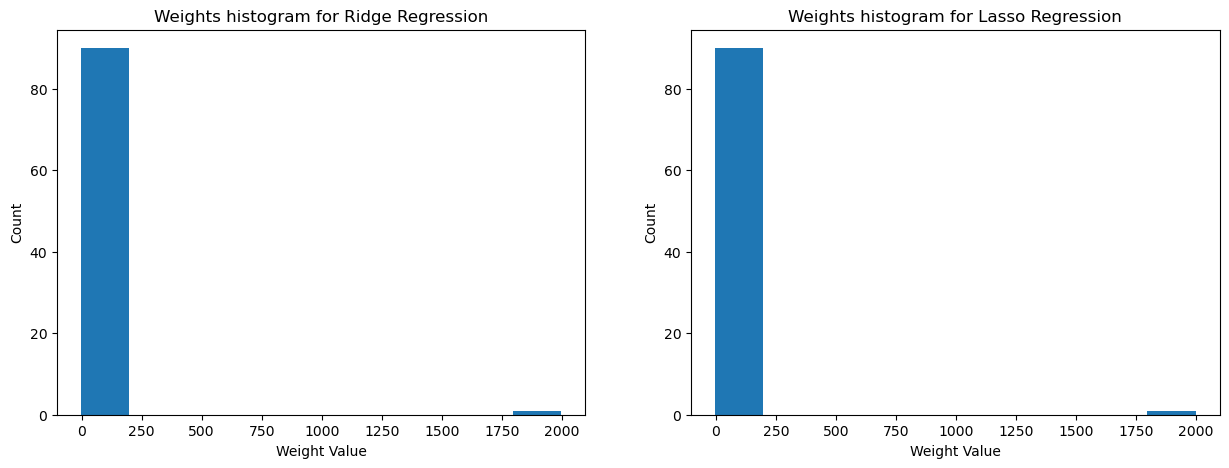

In [63]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(w_ridge)
ax[0].set_xlabel('Weight Value')
ax[0].set_ylabel('Count')
ax[0].set_title('Weights histogram for Ridge Regression')

ax[1].hist(w_lasso)
ax[1].set_xlabel('Weight Value')
ax[1].set_ylabel('Count')
ax[1].set_title('Weights histogram for Lasso Regression')
plt.show()

The two histograms above are very similar. We can also note that the final training and testing losses for Lasso and Ridge regression are very close:
- Lasso: 91.3489 (training), 90.5791 (testing)
- RIDGE: 91.3520 (training), 90.5704 (testing)

Therefore, it is possible that both models have returned approximately the same weights.

In general, however, the L1 regularization used in LASSO tends to push some of the weights to zero, resulting in a sparser model with less non-zero weights. Whereas L2 regularization used in Ridge allows for more non-zero weights in the model. Nonetheless, since the weights' histograms plotted are very similar, it suggests that the differences in the weights between the two methods are minimal.


In [144]:
def avg_mse(year_min, year_max, w_ridge, w_lasso, testYears_int, ntestFeat):
    idx = np.where((testYears_int >= year_min) & (testYears_int <= year_max))[0]
    y_true_filtered = testYears_int[idx]
    pred_ridge = np.round(ntestFeat[idx] @ w_ridge)
    pred_lasso = np.round(ntestFeat[idx] @ w_lasso)
    avg_mse_ridge = musicMSE(y_true_filtered, pred_ridge)
    avg_mse_lasso = musicMSE(y_true_filtered, pred_lasso)
    return avg_mse_ridge, avg_mse_lasso


y0, y1 = 1922, 1944
a, b = avg_mse(y0, y1, w_ridge, w_lasso, testYears_int, ntestFeat)
print(f"Average MSE for year range {y0}-{y1}: {a:.2f} (Ridge), {a:.2f} (Lasso)")
y0, y1 = 1944, 1966
a, b = avg_mse(y0, y1, w_ridge, w_lasso, testYears_int, ntestFeat)
print(f"Average MSE for year range {y0}-{y1}: {a:.2f} (Ridge), {a:.2f} (Lasso)")
y0, y1 = 1966, 1988
a, b = avg_mse(y0, y1, w_ridge, w_lasso, testYears_int, ntestFeat)
print(f"Average MSE for year range {y0}-{y1}: {a:.2f} (Ridge), {a:.2f} (Lasso)")
y0, y1 = 1988, 2011
a, b = avg_mse(y0, y1, w_ridge, w_lasso, testYears_int, ntestFeat)
print(f"Average MSE for year range {y0}-{y1}: {a:.2f} (Ridge), {a:.2f} (Lasso)")

Average MSE for year range 1922-1944: 2690.00 (Ridge), 2690.00 (Lasso)
Average MSE for year range 1944-1966: 990.21 (Ridge), 990.21 (Lasso)
Average MSE for year range 1966-1988: 286.67 (Ridge), 286.67 (Lasso)
Average MSE for year range 1988-2011: 42.12 (Ridge), 42.12 (Lasso)


# SUPPR
##### Discuss and compare the behaviors of the models. Are there certain periods (ranges of years) in which models perform better than others? 
It looks like both Ridge and Lasso models perform relatively well on the period of times between 1988 and 2011. However, the average MSE loss for predicted music between 1922 and 1944 is approximatively 64 times higher than the average MSE loss for the period of time [1988-2011]. This is exactly what we expected when we discussed the dataset as this period of time has significantly more data compared to other period of times.

##### Where are the largest errors across models. 
The largest errors are in the year range [1922, 1944]

##### Did regularization help for some models but not others?
Overall, regularization seems to have helped preventing overfitting and improving generalization performance for both models.

# Problem 5: Softmax Properties
## Part 1:  
### Please refer to the last page of this assignment for Problem 5 Part 1

In [79]:
def softmax_part1(a):
    exp = np.exp(a- np.max(a))
    return (exp)/(exp.sum())

## Part 2:
##### In practice, why is the observation that the softmax function is invariant to constant offsets to its input important when implementing it in a neural network?

The softmax function is often used as an activation function in a neural network. Thus, this observation is important for multiple reasons. First, softmax allows shifting the input by a constant value without changing the output probability, regardless of the initial value of the input. This allows the model to learn patterns that are independent of the absolute values of the input features. 

Moreover, the softmax function computes exponential functions which can lead to values that are too large. That is when normalizing comes in handy: subtracting a constant from the input shifts the range of the exponential functions to a more numerically stable region without changing the values of the output. 
This whole process improves the overall performance of the model and ensures numerical stability for the calculations. This whole process improves the overall performance of the model and ensures numerical stability for the calculations. Other advantages of the softmax are preventing overfitting and simplifying the training.

# Problem 6: Implementing a Softmax Classifier
For this problem, you will use the 2-dimensional Iris dataset. Download iris-train.txt and iris-test.txt from Canvas. Each row is one data instance. The first column is the label (1, 2 or 3) and the next two columns are features.
Write a function to load the data and the labels, which are returned as NumPy arrays.

In [80]:
def load_data(train_path, test_path):
    train = np.loadtxt(train_path)
    test = np.loadtxt(test_path)
    return train, test

iris_train, iris_test = load_data('iris-train.txt', 'iris-test.txt')
train_X, train_y = iris_train[:, [1,2]], iris_train[:, 0]
test_X, test_y = iris_test[:, [1,2]], iris_test[:, 0]

test_X.shape

(51, 2)

## Part 1: Implementation & Evaluation

In [81]:
def normalize_addbias_softmax(train, test):
    mean = np.mean(train, axis = 0)

    train_norm = (train - mean)
    test_norm = (test - mean)
    
    train = np.hstack((train_norm, np.ones((train.shape[0], 1))))
    test = np.hstack((test_norm, np.ones((test.shape[0], 1))))
    
    return train, test

In [82]:
def OHE_zero_indexed(train, test):       
    train_OHE = np.zeros((train.shape[0], int(train.max())+1))
    row_idx = np.arange(train.shape[0])
    column_idx = train.astype(int) 
    train_OHE[row_idx, column_idx] = 1
    train = train_OHE
        
    test_OHE = np.zeros((test.shape[0], int(test.max())+1))
    row_idx = np.arange(test.shape[0])
    column_idx = test.astype(int) 
    test_OHE[row_idx, column_idx] = 1
    test = test_OHE
    
    
    return train, test


def OHE(train, test):    
    train_OHE = np.zeros((train.shape[0], int(train.max())))
    row_idx = np.arange(train.shape[0])
    column_idx = train.astype(int) - 1
    train_OHE[row_idx, column_idx] = 1
    train = train_OHE
        
    test_OHE = np.zeros((test.shape[0], int(test.max())))
    row_idx = np.arange(test.shape[0])
    column_idx = test.astype(int) - 1
    test_OHE[row_idx, column_idx] = 1
    test = test_OHE
    
    return train, test
# y_train_OHE, y_test_OHE = OHE(train_y, test_y)

In [83]:
def softmax(a):
    exp = np.exp(a- np.max(a, axis=1, keepdims=True))
    denominator = np.sum(exp, axis=1, keepdims=True)
    return exp/denominator

In [84]:
def sgd_minibatch_momentum(X_train, y_train, X_test, y_test, \
                                  loss, wd, alpha, lr, epochs, batch_size, momentum, zero_indexed = False):
    
    #One Hot Encoding
    if zero_indexed:
        y_train, y_test = OHE_zero_indexed(y_train, y_test)
    else:
        y_train, y_test = OHE(y_train, y_test)
    
    #initialize weights
    num_features = X_train.shape[1]
    np.random.seed(0)
    w = np.random.normal(0, 0.01, (num_features, y_train.shape[1]))
    
    #initialize momentum
    v = np.zeros((num_features, y_train.shape[1]))
    
    #initialize train and test loss history list
    train_losses = []
    test_losses = []
    
    #initialize train and test accuracy list
    train_accs = []
    test_accs = []
    
    #loop over epochs
    for epoch in range(epochs):
        #shuffle the training data
        permutation = np.random.permutation(X_train.shape[0])
        
        #Retrieve permutations
        X_train_perm = X_train[permutation]
        y_train_perm = y_train[permutation]
        
        #loop over mini-batches
        for i in range(0, X_train_perm.shape[0], batch_size):
            X_batch = X_train_perm[i:i+batch_size]
            y_batch = y_train_perm[i:i+batch_size]
    
            #compute derivative of cross entropy
            pred = softmax(X_batch @ w)
            grad = (X_batch.T @ (pred-y_batch))
            if wd == 'L2':
                #compute derivative of L2 regularization
                reg_grad = l2_reg(alpha, w, grad = True) # 2 * alpha * w
                #add regularization to derivative of loss function
                grad += reg_grad
            elif wd == 'L1':
                reg_grad = l1_reg(alpha, w, grad = True) #alpha * np.sign(w)
                grad += reg_grad
            #update delta w
            v = lr * grad + momentum*v
            #update weights
            w -= v

        #compute train and test loss
        train_pred , test_pred = (X_train @ w), (X_test @ w)
        
        if loss == 'L2': #mse
            train_loss = musicMSE(train_pred, y_train) 
            test_loss = musicMSE(test_pred, y_test)
        elif loss == 'x-entropy':
            train_loss = -np.mean((y_train * np.log(softmax(train_pred))))
            test_loss = -np.mean((y_test * np.log(softmax(test_pred))))
        
        #add regularization
        if wd == 'L2':
            train_loss += l2_reg(alpha, w) #alpha * np.sum(w*w)
            test_loss += l2_reg(alpha, w) #alpha * np.sum(w*w)
        elif wd == 'L1':
            train_loss += l1_reg(alpha, w)
            test_loss += l1_reg(alpha, w)
            
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        train_accs.append(mu_acc(train_pred, y_train))
        test_accs.append(mu_acc(test_pred, y_test))
        
        if epoch%100==0:
            print(f"Epoch {epoch} | training loss: {np.round(train_loss,2)} | test loss: {np.round(test_loss,2)}")

    return w, train_losses, test_losses, train_accs, test_accs


def l2_reg(alpha, w, grad = False):
    if len(w.shape)==1:
        bias = w[-1]
        w_without_bias = w[:-1]
        if grad:
            reg_grad = 2 * alpha * w_without_bias
            return np.append(reg_grad, np.zeros(bias.shape))
    else:
        bias = w[:, -1]
        w_without_bias = w[:, :-1]
        if grad:
            reg_grad = 2 * alpha * w_without_bias
            return np.hstack((reg_grad, np.zeros(bias.shape).reshape(-1, 1)))

    reg = alpha * np.sum(w_without_bias**2)
    return reg

def l1_reg(alpha, w, grad = False):
    if len(w.shape)==1:
        bias = w[-1]
        w_without_bias = w[:-1]
        if grad:
            reg_grad = alpha * np.sign(w_without_bias)
            return np.append(reg_grad, np.zeros(bias.shape))
    else:
        bias = w[:, -1]
        w_without_bias = w[:, :-1]
        if grad:
            reg_grad = alpha * np.sign(w_without_bias)
            return np.hstack((reg_grad, np.zeros(bias.shape).reshape(-1, 1)))

    reg = alpha * np.sum(np.abs(w_without_bias))
    return reg


def mu_acc(pred, y):
    per_class_acc = []
    
    for i in range(y.shape[1]):
        correct = 0
        total = 0
        for j in range(y.shape[0]):
            if y[j][i] == 1:
                if np.argmax(pred[j]) == i:
                    correct += 1
                total += 1
        if total != 0:
            per_class_acc.append(correct / total)
    
    return np.mean(per_class_acc) if per_class_acc else 0.0

Epoch 0 | training loss: 0.37 | test loss: 0.37
Epoch 100 | training loss: 0.24 | test loss: 0.19
Epoch 200 | training loss: 0.22 | test loss: 0.17
Epoch 300 | training loss: 0.2 | test loss: 0.16
Epoch 400 | training loss: 0.2 | test loss: 0.15
Epoch 500 | training loss: 0.19 | test loss: 0.15
Epoch 600 | training loss: 0.19 | test loss: 0.14
Epoch 700 | training loss: 0.19 | test loss: 0.14
Epoch 800 | training loss: 0.19 | test loss: 0.14
Epoch 900 | training loss: 0.19 | test loss: 0.13


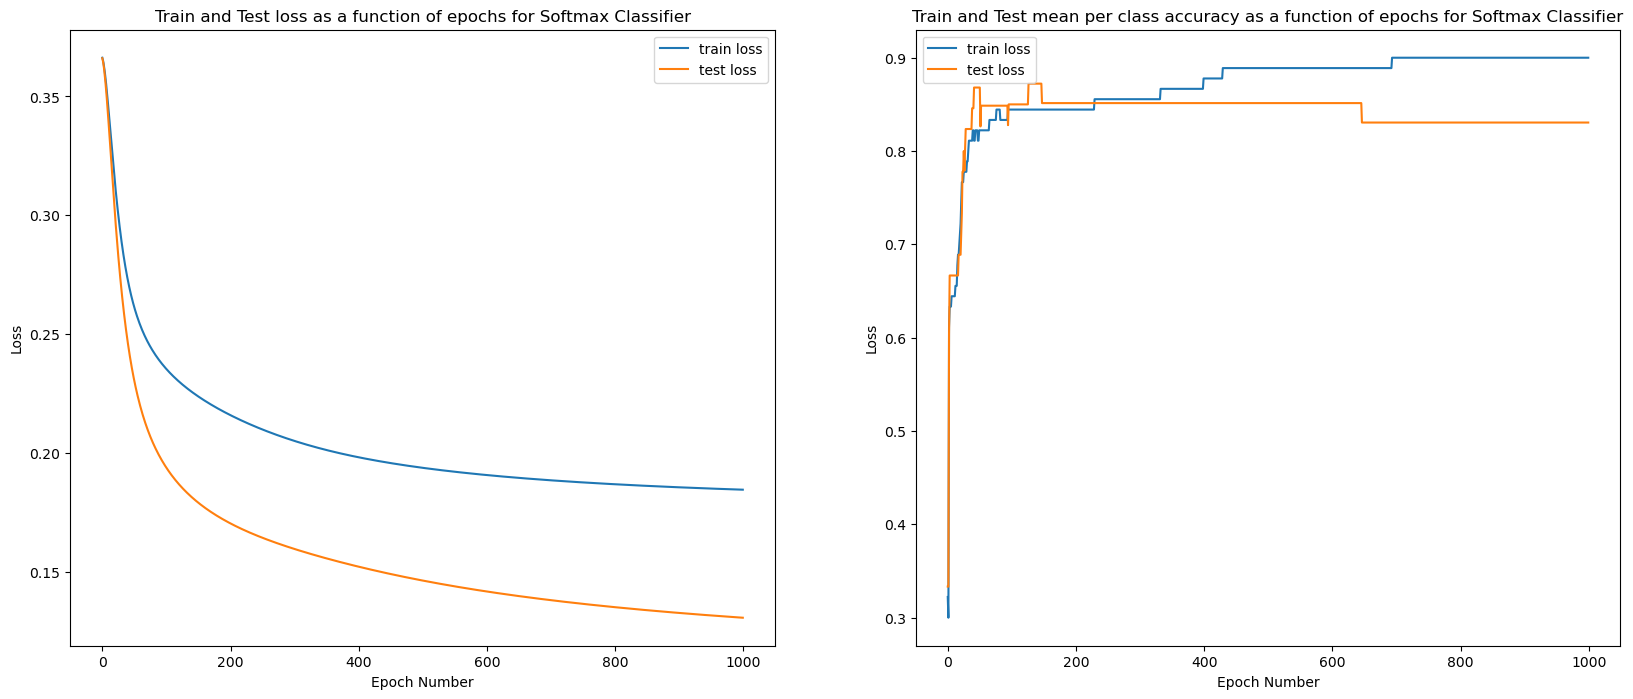

In [109]:
train_norm, test_norm = normalize_addbias_softmax(train_X, test_X)
w_softmax, train_losses, test_losses, train_accs, test_accs = sgd_minibatch_momentum(\
    train_norm, train_y, test_norm, test_y, \
                                             loss= 'x-entropy', wd = 'L2',\
                                            alpha = 0.00001, lr = 0.002, batch_size = 128, \
                                                     epochs = 1000, momentum=0.9)

fig, ax = plt.subplots(1, 2, figsize = (20, 8))

ax[0].plot(train_losses)
ax[0].plot(test_losses)
ax[0].set_xlabel('Epoch Number')
ax[0].set_ylabel('Loss')
ax[0].set_title('Train and Test loss as a function of epochs for Softmax Classifier')
ax[0].legend(['train loss', 'test loss'])



ax[1].plot(train_accs)
ax[1].plot(test_accs)
ax[1].set_xlabel('Epoch Number')
ax[1].set_ylabel('Loss')
ax[1].set_title('Train and Test mean per class accuracy as a function of epochs for Softmax Classifier')
ax[1].legend(['train loss', 'test loss'])
plt.show()

In [108]:
test_accs[-1]

0.8305555555555556

##### What is the best test accuracy your model achieved? 
- The best test accuracy of the model is 83% as seen above

##### What hyperparameters did you use? 
- batch_size: 128
- learning rate: 0.002
- weight decay parameter for L2 regularization: 0.0001
- number of epochs: 1000
- momentum value: 0.9

##### Would early stopping have helped improve accuracy on the test data?
- No, from the graph, we can see that the highest accuracy is attained around 700 epochs and stays constant until completing 1000 epochs. Thus stopping earlier than 1000 epochs would not have improved the accuracy and stopping earlier than 700 epochs would have resulted in a smaller accuracy.

## Part 2: Displaying Decision Boundaries

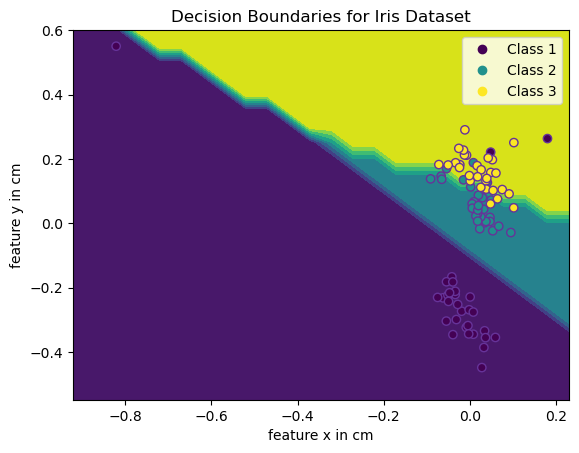

In [110]:
#create meshgrid
x, y = np.meshgrid(np.arange(train_norm[:, 0].min() - 0.1, train_norm[:, 0].max() + 0.1, 0.05), 
                   np.arange(train_norm[:, 1].min() - 0.1, train_norm[:, 1].max() + 0.1, 0.05))

#compute predictions 
pred = softmax(np.c_[x.ravel(), y.ravel(), np.ones((x.ravel().shape[0], 1))] @ w_softmax)
pred = np.argmax(pred, axis=1).reshape(x.shape)

#plot
plt.contourf(x, y, pred)
scatter = plt.scatter(train_norm[:,0], train_norm[:,1], c=train_y, edgecolors='rebeccapurple')
plt.title('Decision Boundaries for Iris Dataset')
plt.xlabel('feature x in cm')
plt.ylabel('feature y in cm')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Class 1', 'Class 2', 'Class 3'])

plt.show()

# Problem 7 - Classifying Images

code from homework 1:

In [111]:
#import necessary packages
import datasets
from datasets import load_dataset
import pandas as pd

train = load_dataset("cifar10", split="train")
test = load_dataset("cifar10", split="test")
#verifying number of unique labels
unique_labels = np.unique(train['label'])
print("Number of unique labels:", len(unique_labels))

Found cached dataset cifar10 (/Users/aya/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)
Found cached dataset cifar10 (/Users/aya/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)


Number of unique labels: 10


In [112]:
train = pd.DataFrame(train).to_numpy()
test = pd.DataFrame(test).to_numpy()

In [113]:
y_train, y_test, X_train, X_test = train[:, 1], test[:, 1], train[:, 0], test[:, 0]

In [114]:
num_img_train, no_img_test = 50000, 10000

X_train_img = np.array([np.array(img).reshape(32, 32, 3) for img in X_train])
X_test_img = np.array([np.array(img).reshape(32, 32, 3) for img in X_test])
print(X_train.shape, X_test.shape)

num_images, h, w, channels = X_train_img.shape
X_train = X_train_img.reshape(num_images, h*w*channels)
num_images, h, w, channels = X_test_img.shape
X_test = X_test_img.reshape(num_images, h*w*channels)

print(X_train.shape, X_test.shape)

(50000,) (10000,)
(50000, 3072) (10000, 3072)


In [115]:
def normalize_addbias_cifar(train, test):
    mean = np.mean(train, axis = 0)
    std = np.std(train, axis = 0)

    train = ((train.copy() - mean)/std).reshape(train.shape[0],-1)
    test = ((test.copy() - mean)/std).reshape(test.shape[0],-1)

    
    train = np.hstack((train.reshape(train.shape[0],-1), np.ones((train.shape[0], 1))))
    test = np.hstack((test.reshape(test.shape[0],-1), np.ones((test.shape[0], 1)))) 
    
    return train, test

Epoch 0 | training loss: 0.21 | test loss: 0.21
Epoch 100 | training loss: 0.17 | test loss: 0.17
Epoch 200 | training loss: 0.17 | test loss: 0.17
Epoch 300 | training loss: 0.17 | test loss: 0.17
Epoch 400 | training loss: 0.16 | test loss: 0.17
Epoch 500 | training loss: 0.16 | test loss: 0.17


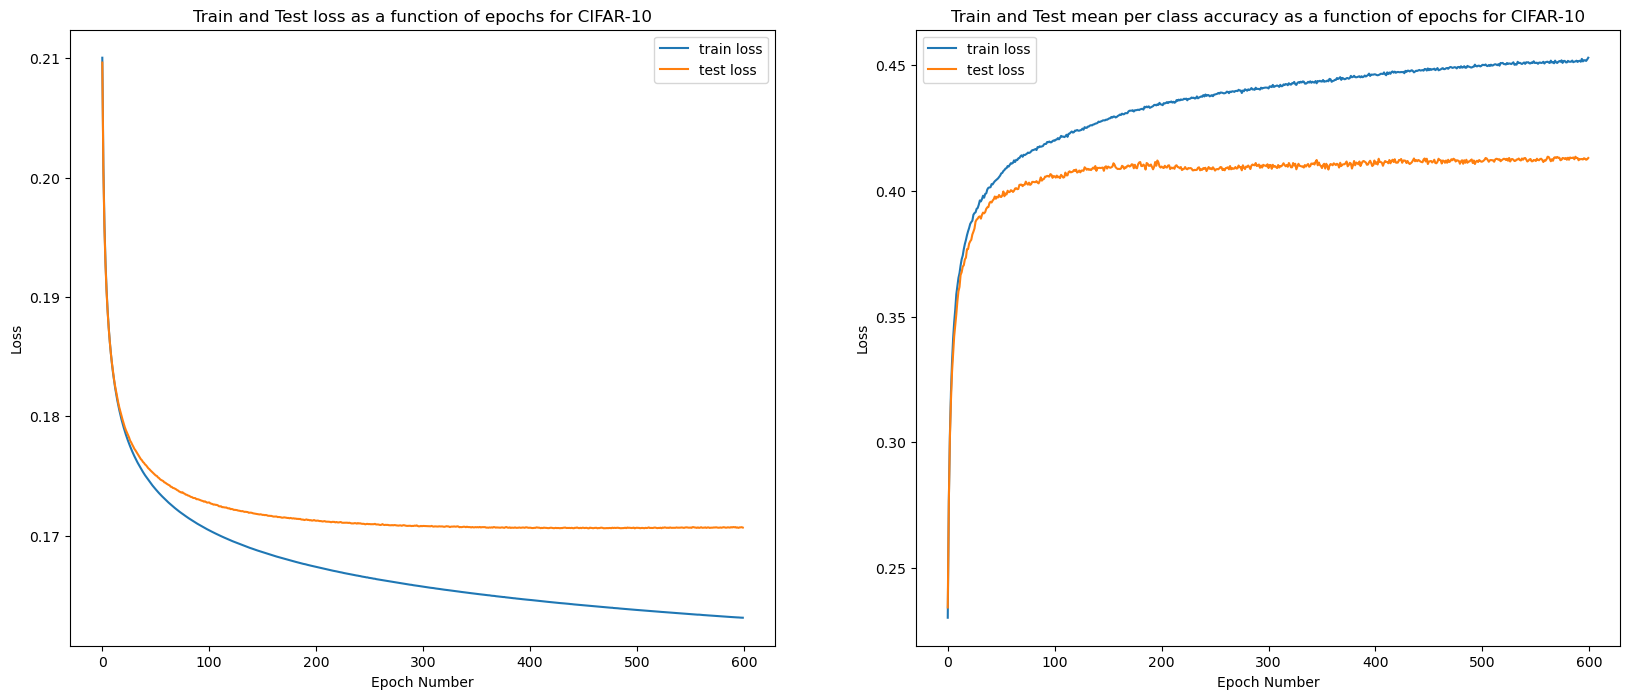

In [119]:
train_normalize, test_normalize = normalize_addbias_cifar(X_train, X_test)

w_cifar, train_losses_cifar, test_losses_cifar, train_accs_cifar, test_accs_cifar = \
                        sgd_minibatch_momentum(train_normalize, y_train, test_normalize, y_test, \
                                             loss= 'x-entropy', wd = None,\
                                            alpha = -1, lr = 0.00000009, batch_size = 256, \
                                                     epochs = 600, momentum=0.9, zero_indexed = True)

fig, ax = plt.subplots(1, 2, figsize = (20, 8))

ax[0].plot(train_losses_cifar)
ax[0].plot(test_losses_cifar)
ax[0].set_xlabel('Epoch Number')
ax[0].set_ylabel('Loss')
ax[0].set_title('Train and Test loss as a function of epochs for CIFAR-10')
ax[0].legend(['train loss', 'test loss'])



ax[1].plot(train_accs_cifar)
ax[1].plot(test_accs_cifar)
ax[1].set_xlabel('Epoch Number')
ax[1].set_ylabel('Loss')
ax[1].set_title('Train and Test mean per class accuracy as a function of epochs for CIFAR-10')
ax[1].legend(['train loss', 'test loss'])
plt.show()

In [122]:
final_train_acc = train_accs_cifar[-1]
final_test_acc = test_accs_cifar[-1]
print('The final test accuracy is: ', final_test_acc)

The final test accuracy is:  0.413


##### What were the best hyperparmeters? 
In order to prevent overfitting, I have chosen a very low learning rate and a high weight decay value

- learning rate: 0.00000009
- batch_size: 256
- number of epochs: 600
- momentum: 0.9
            
##### Output the final test accuracy
As seen above, the final test accuracy is 41.3%

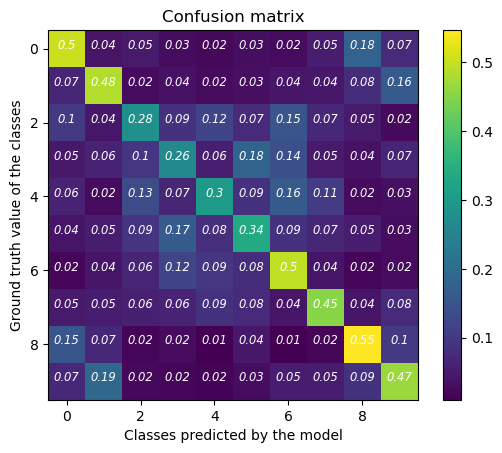

In [130]:
pred = np.argmax(np.exp(test_normalize @ w_cifar) / np.sum(np.exp(test_normalize @ w_cifar), axis=1, keepdims=True), axis=1)

n = 10
matrix = np.zeros((n, n))
for i, j in zip(y_test, pred):
    matrix[i, j] += 1
matrix = matrix / np.sum(matrix, axis=1, keepdims=True)

plt.title('Confusion matrix')
plt.xlabel('Classes predicted by the model')
plt.ylabel('Ground truth value of the classes')
plt.imshow(matrix)
plt.colorbar()

for j in range(n):
    for i in range(n):
        plt.text(i, j, (np.round(matrix[j,i],2)), fontsize = 'small', fontstyle = 'italic', horizontalalignment = 'center', color='white')

